**读取文件**
1. 一行视为一个文档，打印出前10行观察这个文本是什么数据。

2. 使用jieba对所有文档（句子）进行分词，并统计词频。

3. 按词频进行排序，并输出词频最高的前10个词。

4. 引入停用词表（如“的”等语义不重要的词，可以自己定义，或者通过网络查找常用的停用词词表）进行停用词过滤，重新观察词频排序的结果。

5. 用wordcloud对高频词（部分低频词可以删除）进行可视化（词云）。

6. 对词性进行分析，观察不同词性的出现频率，并对特定词性的词进行可视化（词云）。

7. 如果tuple来表示bigram，请统计所有的bigram的频率，并通过可视化观察高频的bigram。


In [1]:
input_file = "week2.txt"

# 打印前10行
def print_lines (file_path):
    with open(file_path, "r", encoding="utf-8")as file:
        for i in range(10):
            line = file.readline()
            if not line:
                break
            print(line, end='')
        
print_lines(input_file)

不碍事，拆线的时候有办法。
这个是锻炼大腿肌肉力量的，大腿肌肉力量强大后走路就不困难了
骨盆没法治疗就这样了，一般发育停止后再说
这不是缝合凹陷表现
您好，一次可以喝两袋
你好，都怎么治疗过啊这半年
所以不建议压腿
购买些外用药物对症处理
年轻人大部分腰背部筋膜炎可能性更多
一般消肿1周时间


先定义一个停用词表

In [4]:
import jieba
# 自定义停用词表
filtered_words = set([
    "的","后","了","是","可以","个","有","没有","吗","啊","哈",
    "啥","吧","这","这种","什么","，","？","…","。","不","就","如果",
    "也","一下","这个","和","有没有","如果","不是","说","在","嗯",
    "您","你","我","会","好","你好"," ","！","\n"
])

对所有词的词频进行统计

In [ ]:
# 使用jieba对所有文档（句子）进行分词，并统计词频
def sentence_cut (file_path):
    with open(file_path, "r", encoding = "utf-8") as file:
        dic = {}
        for i in range(30):
            line = file.readline().strip()
            words = jieba.cut(line, cut_all = False) # words 是一个生成器对象，不是单词
            for word in words:
                # 过滤停用词
                if word not in filtered_words:
                    if word in dic:
                        dic[word] += 1
                    else:
                        dic[word] = 1

        sorted_dic = sorted(dic.items(), key = lambda x: x[1], reverse = True) # sorted_dic是一个列表
        for word, count in sorted_dic:
            print(word, count)
            
sentence_cut(input_file)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/mp/r38gzk1d1h13tftkrgp3vv0w0000gn/T/jieba.cache
Loading model cost 0.769 seconds.
Prefix dict has been built successfully.


评价 8
问题 7
满意 5
& 4
quot 4
; 4
肌肉 3
现在 3
关闭 3
锻炼 2
大腿 2
治疗 2
一般 2
您好 2
都 2
建议 2
腰 2
做 2
不会 2
一个 2
对 2
咨询 2
请 2
（ 2
按钮 2
可 2
摁 2
着 2
疼 2
医院 2
自动 2
给 2
页面 2
碍事 1
拆线 1
时候 1
办法 1
力量 1
力量强大 1
走路 1
困难 1
骨盆 1
没法 1
这样 1
发育 1
停止 1
再说 1
缝合 1
凹陷 1
表现 1
一次 1
喝 1
两袋 1
怎么 1
过 1
半年 1
所以 1
压腿 1
购买 1
些 1
外用 1
药物 1
对症 1
处理 1
年轻人 1
大部分 1
背部 1
筋 1
膜炎 1
可能性 1
更 1
多 1
消肿 1
1 1
周 1
时间 1
😊 1
钙片 1
吃 1
止痛 1
留着 1
不吃 1
骶 1
以及 1
臀部 1
疼痛 1
腰椎病 1
相关 1
情况 1
多长时间 1
那 1
还是 1
去 1
胃镜 1
看看 1
因为 1
备孕 1
适合 1
吃药 1
感觉 1
症状 1
像 1
当然 1
担心 1
以后 1
后遗症 1
那么 1
CT 1
三维 1
最好 1
红肿 1
平时 1
穿 1
鞋 1
紧不紧 1
本次 1
给予 1
很 1
入口 1
点击 1
右上 1
进行 1
浏览器 1
用户 1
工作 1
最大 1
支持 1
祝您 1
身体健康 1
活动 1
长沙 1
一样 1
三甲 1
基本上 1
价格 1
换过 1
药 1
看见 1
伤口 1
样子 1
待 1
麻烦 1
好评 1
收藏 1
关注 1
随时 1
帮 1
解答 1
要是 1
没 1
欢迎您 1
“ 1
” 1
右上角 1
下面 1
） 1
春雨 1
系统 1
赠送 1
一张 1
复诊 1
优惠券 1
还有 1
别的 1


   - 使用jieba对所有文档（句子）进行分词，并统计词频。
   - 按词频进行排序，并输出词频最高的前10个词。

In [6]:
# 打印词频所有
# 使用jieba对所有文档（句子）进行分词，并统计词频
def sentence_cut_frequency (file_path):
    dic = {}
    try:
        with open(file_path, "r", encoding = "utf-8") as file:
            # for line in file :
            for _ in file:
                line = file.readline().strip()
    
                # words 是一个生成器对象，不是单词
                words = jieba.cut(line, cut_all = False)
                for word in words:
                    ### 过滤停用词
                    if word not in filtered_words:
                        if word in dic:
                            dic[word] += 1
                        else:
                            dic[word] = 1
    except Exception as e: # try之后要用except块或者finally
        print(f"Error reading file: {e}")
    # sorted_dic 是一个包含键值对的列表
    sorted_dic = sorted(dic.items(), key = lambda x: x[1], reverse = True)
    # 打印前十个最大频率的单词
    for i in range(10):
        print(sorted_dic[i])
        
    return sorted_dic

    
sentence_cut_frequency(input_file)

('问题', 4014)
('情况', 2423)
('治疗', 2354)
('需要', 2261)
('评价', 2230)
('做', 1904)
('疼痛', 1859)
('可能', 1767)
('症状', 1750)
('看', 1750)


[('问题', 4014),
 ('情况', 2423),
 ('治疗', 2354),
 ('需要', 2261),
 ('评价', 2230),
 ('做', 1904),
 ('疼痛', 1859),
 ('可能', 1767),
 ('症状', 1750),
 ('看', 1750),
 ('客气', 1729),
 ('都', 1726),
 ('建议', 1598),
 ('手术', 1598),
 ('给', 1562),
 ('一个', 1497),
 ('现在', 1490),
 ('活动', 1465),
 ('一般', 1443),
 ('对', 1437),
 ('看看', 1410),
 ('骨折', 1399),
 ('没', 1375),
 ('去', 1357),
 ('片子', 1348),
 ('要', 1307),
 ('就是', 1286),
 ('还是', 1277),
 ('医院', 1267),
 ('咨询', 1228),
 ('满意', 1227),
 ('检查', 1218),
 ('休息', 1208),
 ('大', 1180),
 ('或者', 1127),
 ('的话', 1115),
 ('那', 1085),
 ('考虑', 1080),
 ('不要', 1075),
 ('很', 1052),
 ('、', 1031),
 ('锻炼', 1012),
 ('多', 1009),
 ('应该', 998),
 ('损伤', 971),
 ('能', 966),
 ('页面', 943),
 ('吃', 934),
 ('再', 919),
 ('您好', 910),
 ('\\', 879),
 ('还', 871),
 ('”', 867),
 ('用', 866),
 ('呢', 860),
 ('注意', 849),
 ('“', 848),
 ('不用', 844),
 ('关节', 835),
 ('引起', 831),
 ('先', 828),
 ('局部', 822),
 ('😊', 820),
 ('等', 798),
 ('热敷', 796),
 ('到', 793),
 ('下', 787),
 ('可', 786),
 ('不会', 785),
 ('肌肉', 778),
 ('n

用 **wordcloud** 对高频词（部分低频词可以删除）进行可视化（词云）。

In [5]:
# 统计并绘制所有词的词云
import os
from os import path
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageFont #加载字体

In [16]:
# 绘制词云         
def makeImage(text):
    font_path = '/System/Library/Fonts/STHeiti Light.ttc'
    wc = WordCloud(font_path = font_path, background_color="white", max_words=1000)
    # generate word cloud
    # text是字典或者类似的数据结构
    wc.generate_from_frequencies(dict(text))

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

注意这里 `input_file = "week2.txt"`

('问题', 4014)
('情况', 2423)
('治疗', 2354)
('需要', 2261)
('评价', 2230)
('做', 1904)
('疼痛', 1859)
('可能', 1767)
('症状', 1750)
('看', 1750)


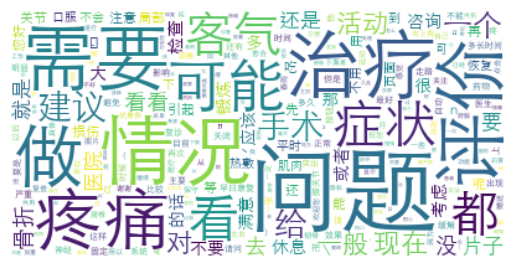

In [ ]:
makeImage(sentence_cut_frequency(input_file))

这里我们以名词为例进行词性统计：   
   - 现在我们有一个整理出来的词频统计的列表，键是词汇，值是词频
   - 遍历所有的键，将键是名形词 `an` 的items筛选换出来，形成一个新字典，再作图
   - 用`use_paddle`方法将所有词的词性统计出来，然后全部封装进字典，将字典的值为动副词`vn`的值;将词性作为键，词性出现的频率是值

In [11]:
import jieba.posseg as pseg
# 使用 pseg.cut 方法进行分词和词性标注,注意处理的是行对象

# 统计词性
def count_noun(file_path):# 返回应该是一个字典
    # 初始化一个字典储存词性
    noun_dic = {}
    with open(file_path, "r", encoding = "utf-8") as file:
        for _ in file:
            line = file.readline().strip()
            words = pseg.cut(line)
            for word, flag in words:
                if flag == "n": # 筛选词性为"n"的词性
                    if word in noun_dic:
                        noun_dic[word] += 1
                    else:
                        noun_dic[word] = 1
    return noun_dic 


In [12]:
count_noun(input_file)

{'大腿': 146,
 '肌肉': 778,
 '力量': 199,
 '走路': 600,
 '外用': 392,
 '药物': 643,
 '对症': 194,
 '消肿': 158,
 '时间': 680,
 '腰骶': 1,
 '臀部': 76,
 '疼痛': 1859,
 '腰椎病': 6,
 '建议': 1598,
 '胃镜': 10,
 '后遗症': 59,
 '红肿': 95,
 '鞋': 28,
 '药': 412,
 '伤口': 277,
 '样子': 26,
 '问题': 4014,
 '情况': 2423,
 '指导': 51,
 '客气': 1729,
 '用药': 150,
 '症状': 1750,
 '局部': 822,
 '片子': 1348,
 '椎间盘': 242,
 '效果': 590,
 '医院': 1267,
 '检查一下': 173,
 '拍片': 156,
 '先用点': 8,
 '止痛药': 100,
 '腿': 380,
 '关心': 6,
 '四肢': 34,
 '膝关节': 634,
 '大面积': 4,
 '浅表': 8,
 '擦皮': 1,
 '创口': 7,
 '皮下': 27,
 '压痛': 74,
 '颈痛': 10,
 '颗粒': 47,
 '直腿': 43,
 '靠墙': 11,
 '时': 249,
 '记录': 35,
 '尺骨': 15,
 '曲度': 73,
 '伤口发炎': 3,
 '手术': 1598,
 '绷带': 25,
 '不透气': 1,
 '口服': 759,
 '甲': 164,
 '胺': 133,
 '口服药物': 72,
 '手指': 231,
 '腱鞘炎': 63,
 '腕关节': 43,
 '磁共振': 365,
 '头像': 261,
 '我会': 129,
 '文章': 73,
 '疾病': 321,
 '尿酸': 92,
 '头孢类': 9,
 '骨干': 3,
 '骨折': 1399,
 '基本': 148,
 '外伤': 370,
 '颈椎': 521,
 '比较严重': 31,
 '石膏': 414,
 '方面': 89,
 '碘': 104,
 '方法': 199,
 '微创': 121,
 '复发率': 6,
 '界面': 9,
 '血肿': 30

In [23]:
type(count_noun(input_file))

dict

对词性进行分析，观察不同词性的出现频率，并对特定词性的词进行可视化（词云）。

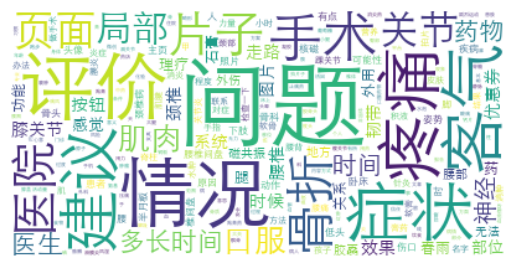

In [17]:
makeImage(count_noun(input_file))

In [31]:
# 打印前十最为高频的名词
def print_part_of_speech(dic):
    tuple_lst = sorted(dic.items(), key=lambda x:x[1], reverse=True) #list, 元素是元组
    for i in range(10): # 打印前10最高频的名词
        print('{}'.format(i+1), tuple_lst[i])
print_part_of_speech(count_noun(input_file))

1 ('问题', 4014)
2 ('情况', 2423)
3 ('评价', 2230)
4 ('疼痛', 1859)
5 ('症状', 1750)
6 ('客气', 1729)
7 ('建议', 1598)
8 ('手术', 1598)
9 ('骨折', 1399)
10 ('片子', 1348)
